# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** B

**Names:**

* Vincenzo Bazzucchi
* Amaury Combes
* Alexis Montavon

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
import networkx as nx
import json
import epidemics_helper
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Import the data
def graph_from_json(pathname):
    json_file = open(pathname, 'r')
    data = json.load(json_file)
    json_file.close()
    G = nx.Graph()
    for node in data['nodes']:
        G.add_node(node['id'], coordinates=node['coordinates'])
    for edge in data['links']:
        G.add_edge(edge['source'], edge['target'])
    return G

In [4]:
G = graph_from_json('../data/nyc_augmented_network.json')

In [5]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)

In [7]:
sir.launch_epidemic(source=23654, max_time=100.)

Epidemic stopped after 108.53 days | 108.53 days elapsed | 0.2% susceptible, 0.0% infected, 99.8% recovered


In [11]:
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

def epidemic_evolution(G, sir):
    infected_by_day = np.zeros(100)
    recovered_by_day = np.zeros(100)
    susceptible_by_day = np.zeros(100)
    n = len(G)
    for day in range(100):
        for node in G:
            status = sir.get_node_status(node, day)
            if status == SUSCEPTIBLE:
                susceptible_by_day[day] += 1
            elif status == INFECTED:
                infected_by_day[day] += 1
            else:
                recovered_by_day[day] += 1
    infected_by_day = (100. * infected_by_day) / n
    recovered_by_day = (100. * recovered_by_day) / n
    susceptible_by_day = (100. * susceptible_by_day) / n
    return susceptible_by_day, recovered_by_day, infected_by_day

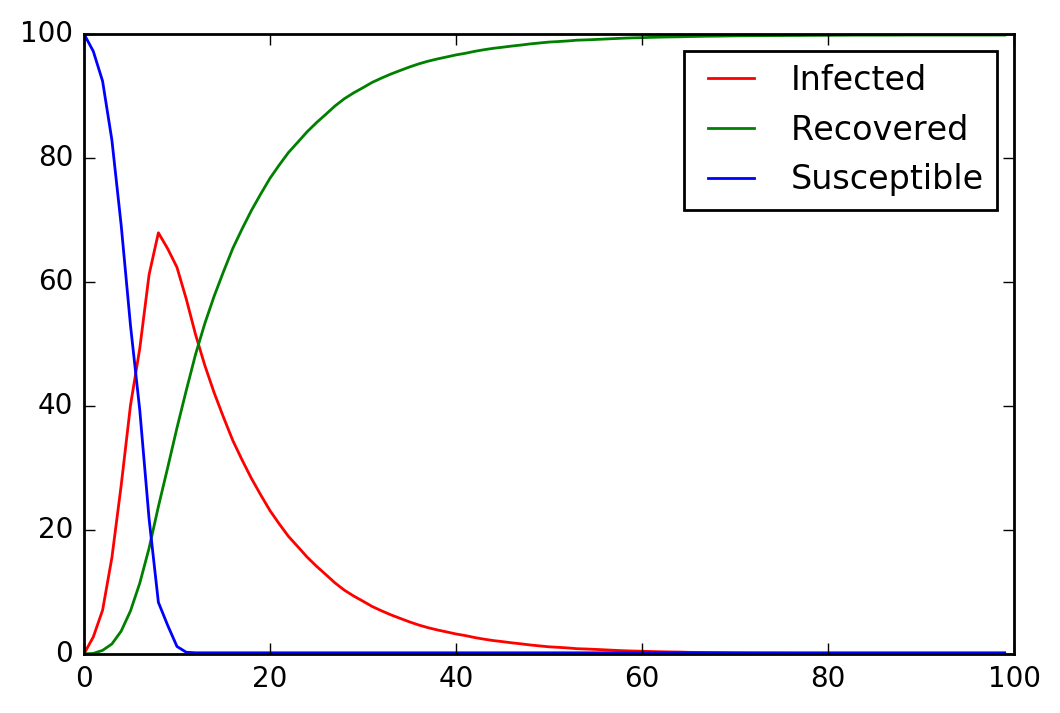

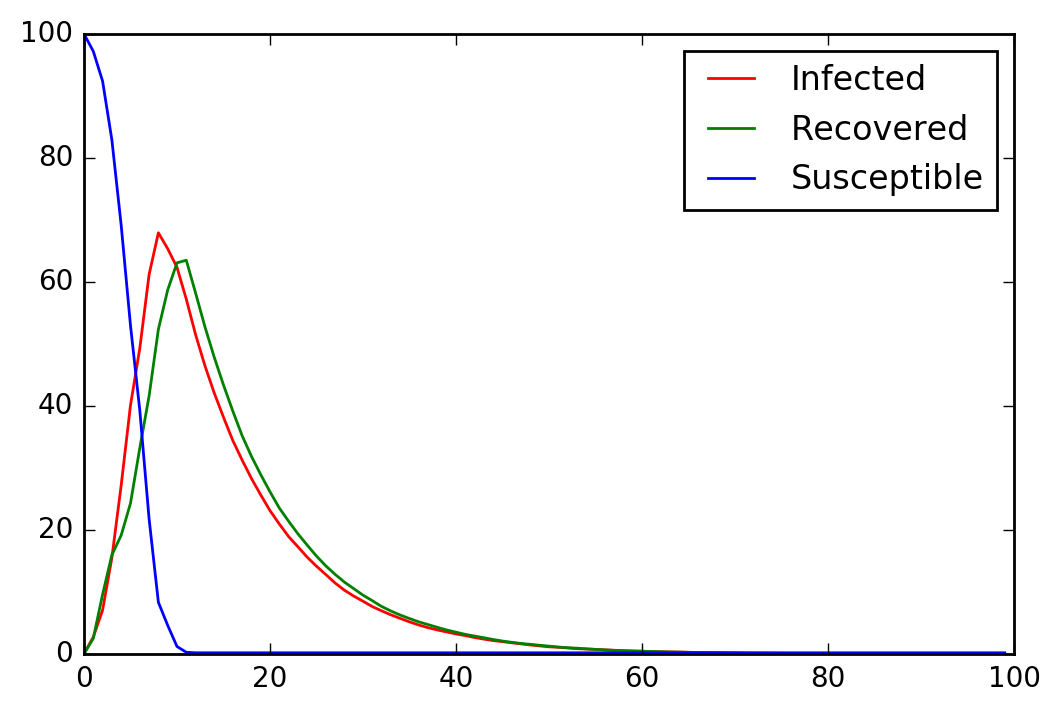

In [43]:
susceptible, recovered, infected = epidemic_evolution(G, sir)
fig, ax = plt.subplots()
ax.plot(infected, 'r', label='Infected')
ax.plot(recover, 'g', label='Recovered')
ax.plot(susceptible, 'b', label='Susceptible')
ax.legend()

In [14]:
print("It takes", np.where(infected >= 60.)[0][0],"days to infect 60% of the population")
print("After", np.where(infected >= 60.)[0][0],"days 60% of the population has recovered (died/healed)")

It takes 7 days to infect 60% of the population
After 7 days 60% of the population has recovered (died/healed)


In [ ]:
fig_size = [0, 0]
fig_size[0] = 18
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

In [15]:
def map_after(graph, sir, day):
    color = ['b']*len(G)
    for node in G:
        status = sir.get_node_status(node, day)
        if status == INFECTED :
            color[node] = 'r'
        elif status == RECOVERED :
            color[node] = 'g'
        else:
            color[node] = 'b'
    return nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'coordinates'), node_size=50, with_labels=False, node_color=color)

(-74050000.0, -73800000.0, 40600000.0, 40950000.0)

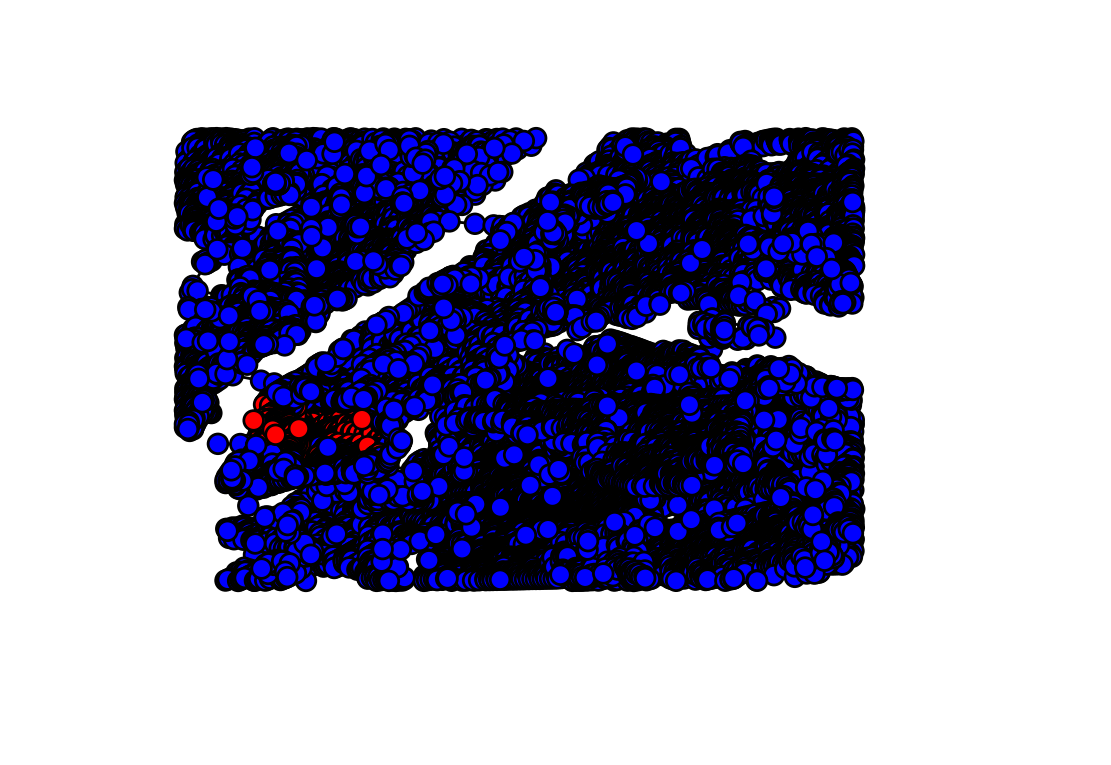

In [16]:
map_after(G, sir, 1)
plt.axis('off')

(-74050000.0, -73800000.0, 40600000.0, 40950000.0)

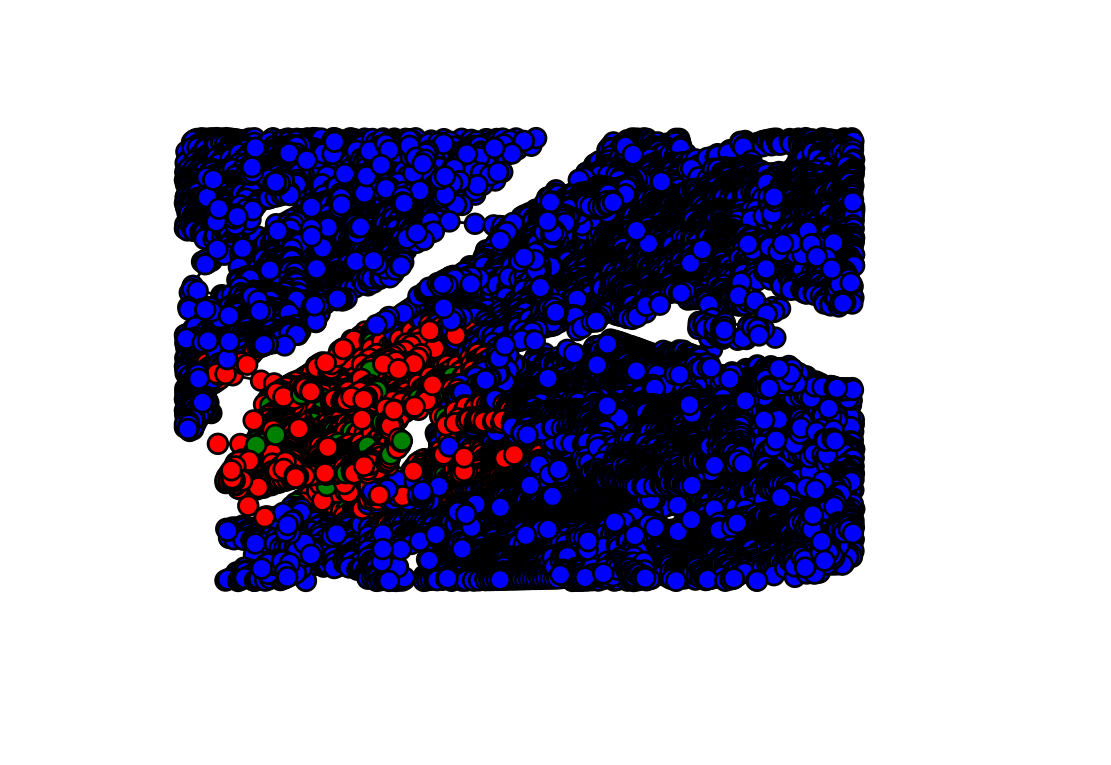

In [17]:
map_after(G, sir, 3)
plt.axis('off')

(-74050000.0, -73800000.0, 40600000.0, 40950000.0)

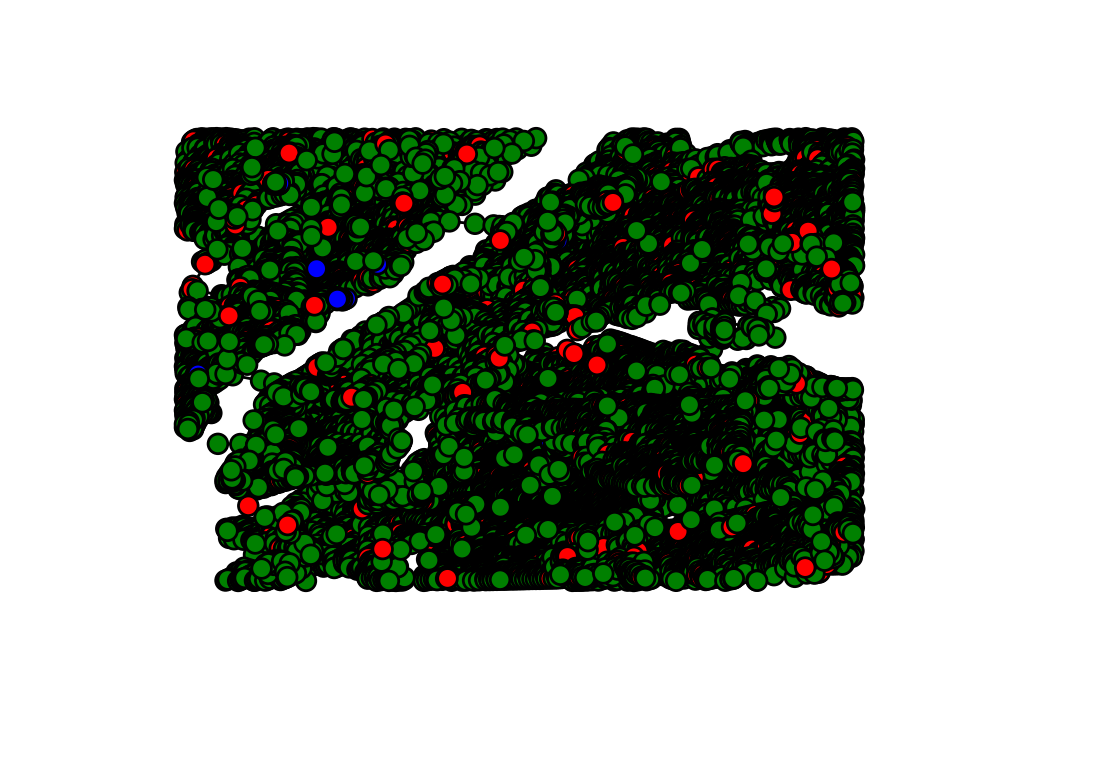

In [18]:
map_after(G, sir, 30)
plt.axis('off')

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [39]:
from random import sample, choice

In [40]:
G1 = graph_from_json('../data/nyc_augmented_network.json')
G1.remove_edges_from(sample(G.edges(), 1000))

Epidemic stopped after 101.72 days | 101.72 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 99.74 days | 99.74 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 101.44 days | 101.44 days elapsed | 0.6% susceptible, 0.0% infected, 99.4% recovered
Epidemic stopped after 120.36 days | 120.36 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 139.20 days | 139.20 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 103.06 days | 103.06 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 100.00 days | 100.00 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 101.98 days | 101.98 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 113.25 days | 113.25 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 111.82 

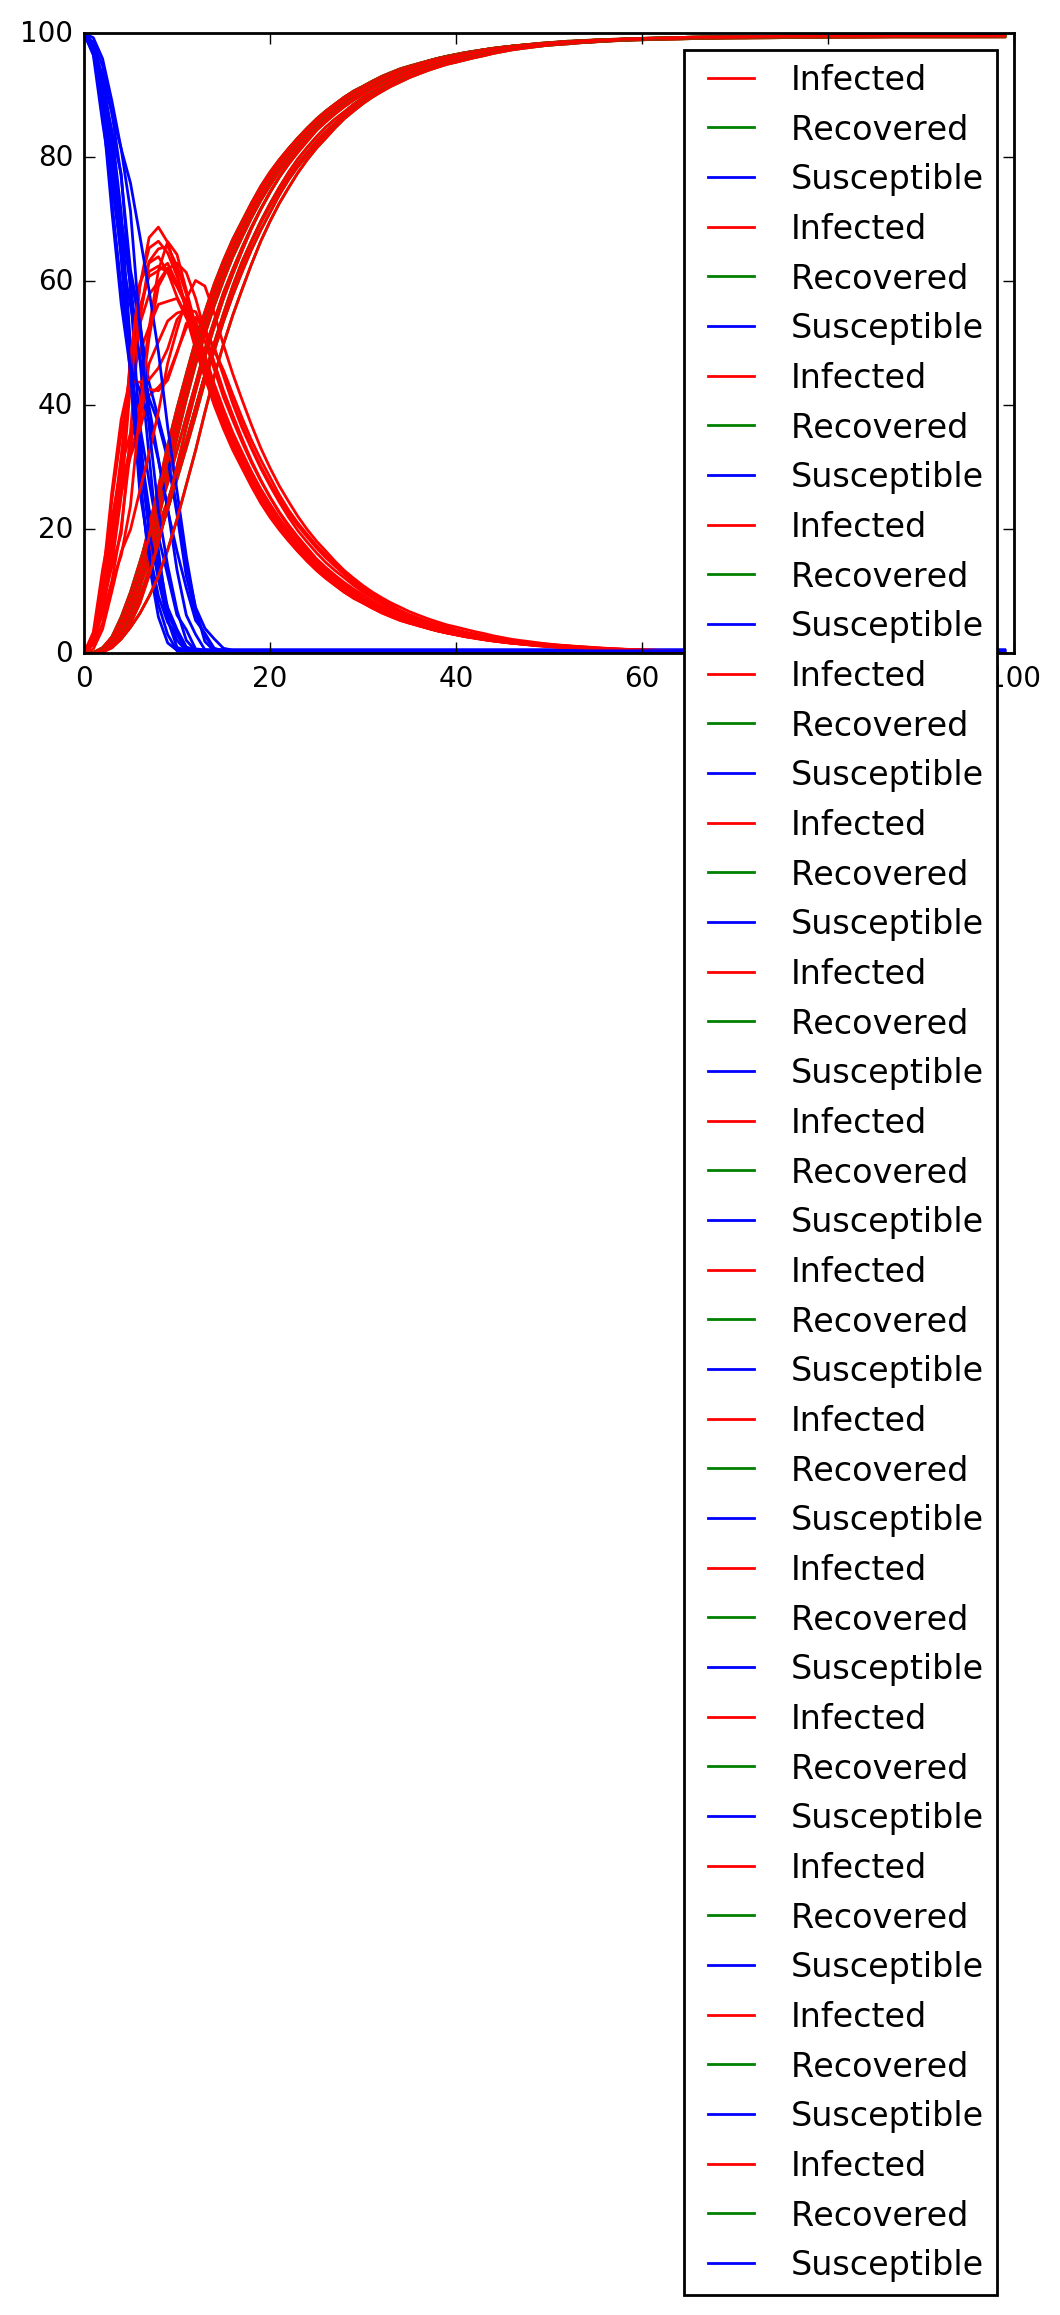

In [55]:
fig, ax = plt.subplots()
infected_after_30d = 0
recovered_after_30d = 0
susceptible_after_30d = 0
N_SIMULATION = 15
for i in range(N_SIMULATION): # SLOW
    sir2 = epidemics_helper.SimulationSIR(G1, beta=10.0, gamma=0.1)
    s = choice(G1.nodes())
    sir2.launch_epidemic(source=s, max_time=100.)
    susceptible, infected, recover = epidemic_evolution(G1, sir2)
    infected_after_30d += infected[31]
    recovered_after_30d += recover[31]
    susceptible_after_30d += susceptible[31]
    ax.plot(infected, 'r')

print("Average of infected after 30 days:", infected_after_30d / N_SIMULATION)
print("Average of dead after 30 days:", recovered_after_30d / N_SIMULATION)
print("Average of infected after 30 days:", susceptible_after_30d / N_SIMULATION)

This strategy does not seems effective BLABLABLA

In [50]:
#TODO: Average of healty, infected, dead after 30 days

In [51]:
#TODO: What happens if delete x10 edges?

#### Exercise 2.11: Strategy 2

In [52]:
G2 = graph_from_json('../data/nyc_augmented_network.json')

Instead of removing random edges, we do a random walk on the graph and delete edges as we go. This, as we learned studying the friendship paradox, should give us a bias towards higher degree nodes and therefore isolate "more dangerous" nodes.